### Linear Regression Model

In [40]:
#Import Libraries 
library(dplyr)
library(ggplot2)

### Generating own data for linear model
#### Column 'type' contains 3 types : Homoscedastic, Heteroscedastic and Quadratic


In [41]:
a= 5 #Intercept
b= 0.2 #Slope
x= runif(30, min=0.10, max = 50) #runif - random deviates of uniform distribution
y= a + b*x + rnorm(30, sd= 2) #rnorm - vector of random numbers with a normal distribution added as Noise
df = data.frame(x=x, y=y, type = "homoscedastic")
print(tail(df))

           x         y          type
25  2.084150  6.035746 homoscedastic
26 45.928336 13.224926 homoscedastic
27 35.138485 13.348005 homoscedastic
28  7.216584  4.517110 homoscedastic
29 28.972389  8.654128 homoscedastic
30 43.012015 13.468748 homoscedastic


In [42]:
y = a + b*x + rnorm(30, sd=0.05) * (x+15)
df = rbind(df, data.frame(x=x,y=y, type = "heteroscedastic"))
print(tail(df))

           x         y            type
55  2.084150  5.190452 heteroscedastic
56 45.928336 16.157950 heteroscedastic
57 35.138485 14.946874 heteroscedastic
58  7.216584  5.952618 heteroscedastic
59 28.972389  9.164514 heteroscedastic
60 43.012015 17.789200 heteroscedastic


In [43]:
y = x^2/40+ a + rnorm(30, sd=2)
df = rbind(df, data.frame(x=x,y=y, type = "quadratic"))
print(tail(df))

           x          y      type
85  2.084150  0.8050668 quadratic
86 45.928336 57.9432603 quadratic
87 35.138485 38.5894852 quadratic
88  7.216584  3.8707825 quadratic
89 28.972389 25.9161104 quadratic
90 43.012015 54.6728953 quadratic


#### Create linear regression model for the data formed and analysing the summary function values

In [56]:
print("----------------------------Type - homoscedastic-----------------------------------------")
reg <- lm(data=df[df$type=="homoscedastic",],y~x)
summary(reg)


print("----------------------------Type - heteroscedastic-----------------------------------------")
reg <- lm(data=df[df$type=="heteroscedastic",],y~x)
summary(reg)


print("----------------------------Type - quadratic-----------------------------------------")
reg <- lm(data=df[df$type=="quadratic",],y~x)
summary(reg)
print("---------------------------------------------------------------------")

[1] "----------------------------Type - homoscedastic-----------------------------------------"



Call:
lm(formula = y ~ x, data = df[df$type == "homoscedastic", ])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6026 -0.6647  0.1513  1.2278  2.8544 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.33555    0.51226   8.464 3.34e-09 ***
x            0.20412    0.01725  11.833 2.07e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.526 on 28 degrees of freedom
Multiple R-squared:  0.8333,	Adjusted R-squared:  0.8274 
F-statistic:   140 on 1 and 28 DF,  p-value: 2.073e-12


[1] "----------------------------Type - heteroscedastic-----------------------------------------"



Call:
lm(formula = y ~ x, data = df[df$type == "heteroscedastic", ])

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6267 -1.5561 -0.0976  1.2860  5.6683 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.43944    0.78615   5.647 4.75e-06 ***
x            0.21701    0.02647   8.197 6.37e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.343 on 28 degrees of freedom
Multiple R-squared:  0.7059,	Adjusted R-squared:  0.6954 
F-statistic: 67.19 on 1 and 28 DF,  p-value: 6.368e-09


[1] "----------------------------Type - quadratic-----------------------------------------"



Call:
lm(formula = y ~ x, data = df[df$type == "quadratic", ])

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5741 -4.0354 -0.8281  4.9952  9.1723 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.28437    1.87881  -2.813  0.00888 ** 
x            1.27665    0.06327  20.178  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.598 on 28 degrees of freedom
Multiple R-squared:  0.9357,	Adjusted R-squared:  0.9334 
F-statistic: 407.2 on 1 and 28 DF,  p-value: < 2.2e-16


[1] "---------------------------------------------------------------------"


#### plot(reg) - Diagnostic plot
#### 1. Scatterplot of residuals against fitted values (residuals vs. fitted).
#### 2. Normal Q-Q plot of residuals.
#### 3. Scale-location plot (square root of standardized residuals against fitted values).
#### 4. Residuals vs. leverage plot.


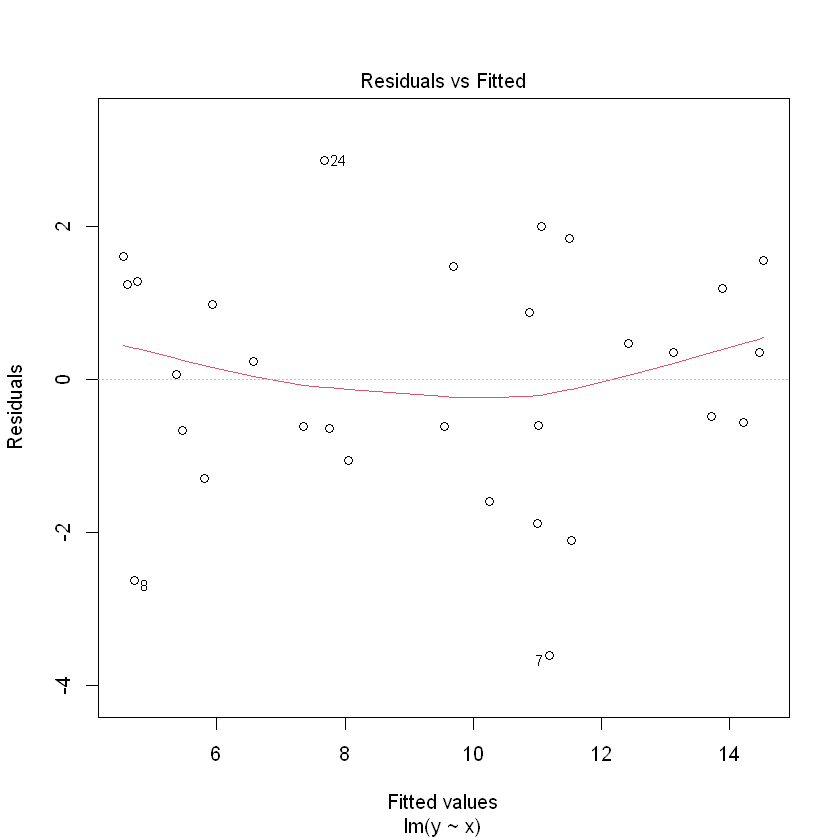

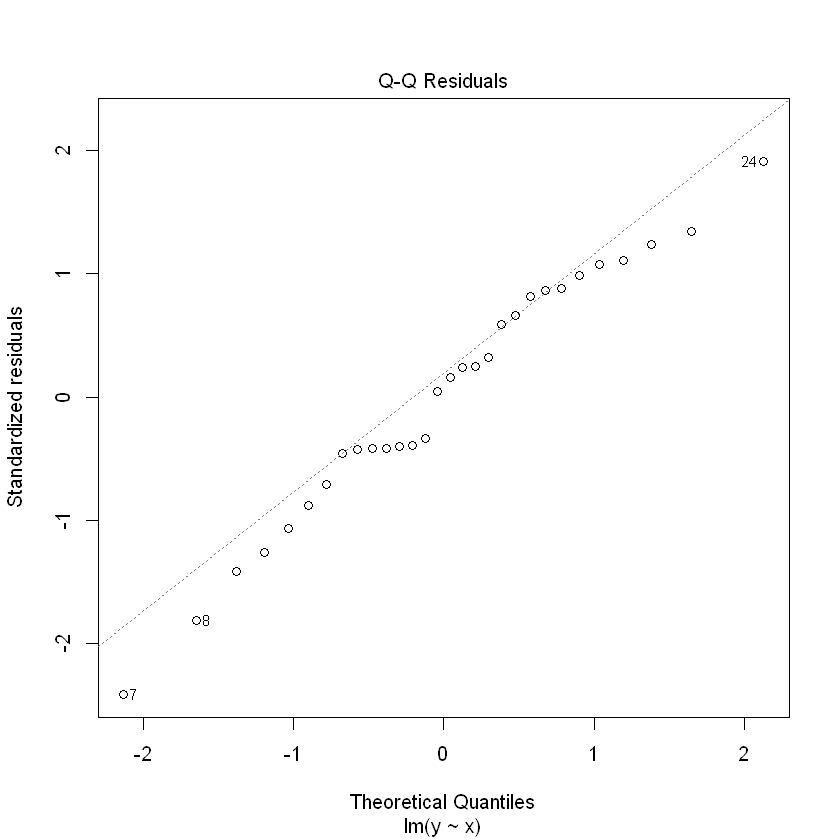

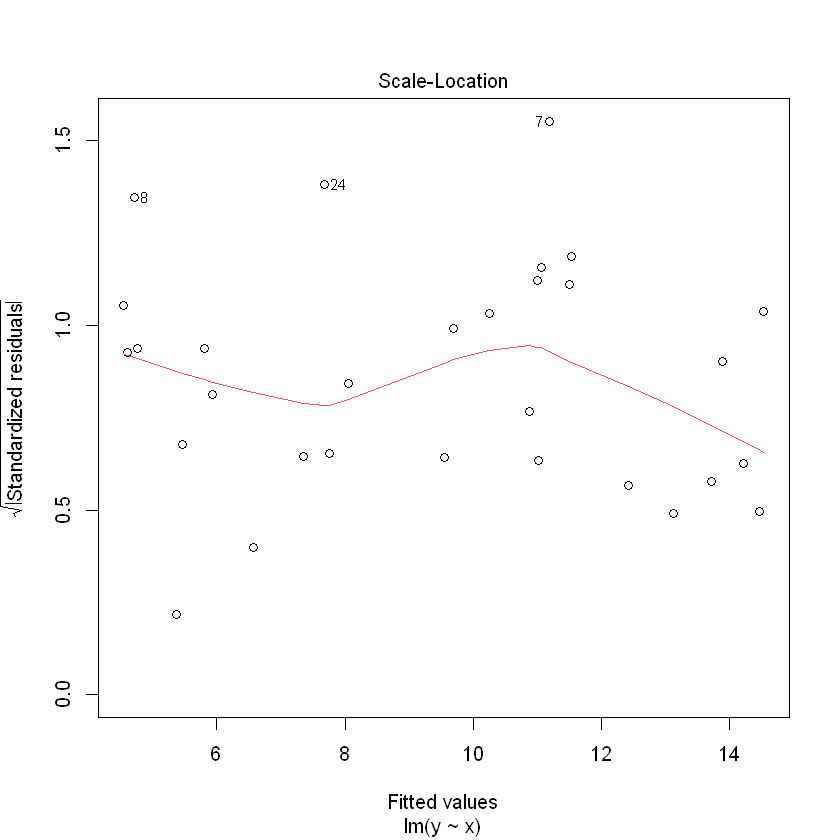

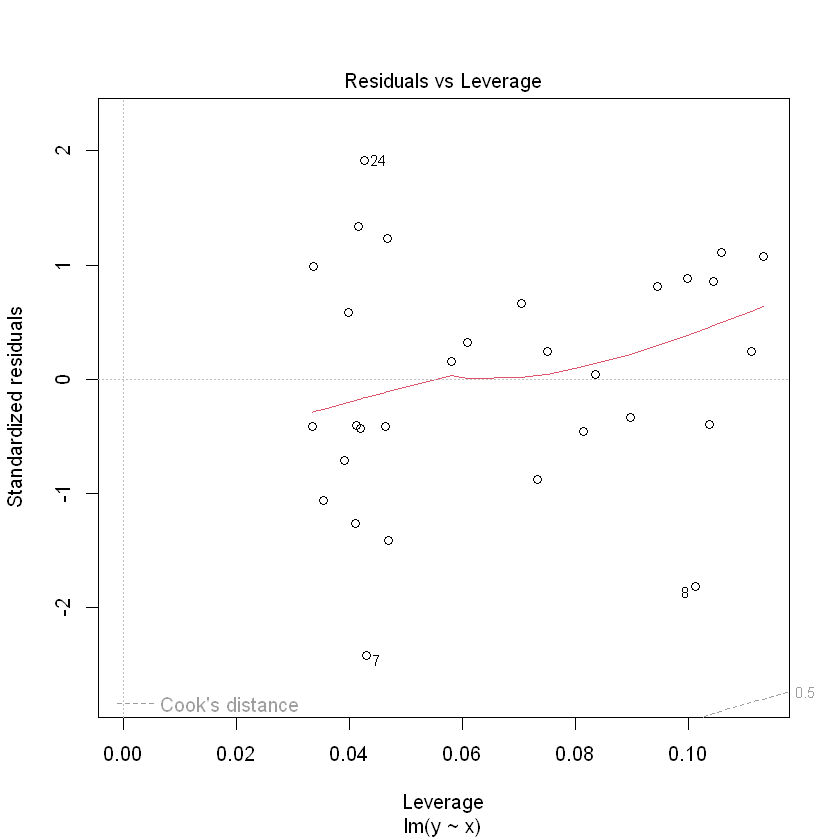

In [66]:
reg <- lm(data=df[df$type=="homoscedastic",],y~x)
par(mfrow=c(1,1)); 
plot(reg); 

#### Polynomial regression with the quadratic data and Prediction of Y values using the Quadratic Model
 The geom_point function adds blue points for each data point, and geom_line adds a red line based on the predicted values (yv) from the quadratic regression model.


Call:
lm(formula = y ~ x + x2, data = df[df$type == "quadratic", ])

Residuals:
    Min      1Q  Median      3Q     Max 
-4.9206 -1.1185 -0.0011  1.0846  3.2169 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.945224   0.854554   3.447  0.00187 ** 
x           0.103572   0.083261   1.244  0.22421    
x2          0.023814   0.001632  14.589 2.51e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.913 on 27 degrees of freedom
Multiple R-squared:  0.9928,	Adjusted R-squared:  0.9922 
F-statistic:  1850 on 2 and 27 DF,  p-value: < 2.2e-16


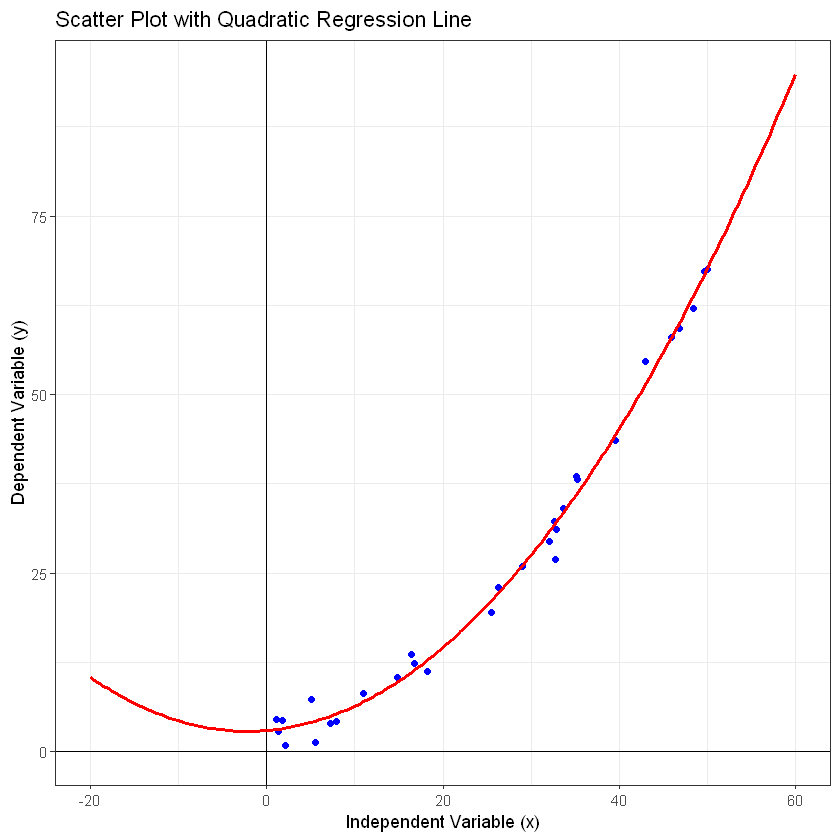

In [77]:
df$x2=df$x^2
reg_quad <- lm(data=df[df$type=="quadratic",],y~x+x2)
summary(reg_quad)
xv <- seq(-20,60,.5)
# Prediction of Y values using the Quadratic Model
yv <- predict(reg_quad, list(x=xv,x2=xv^2))

# Scatter Plot with Quadratic Regression Line
ggplot(data=df[df$type=="quadratic",]) + theme_bw() +
      geom_hline(yintercept=0) + geom_vline(xintercept=0) +
      geom_point(aes(x=x,y=y),color="blue") +
      geom_line(data=data.frame(x=xv,y=yv),aes(x=x,y=y),color="red",size=1)  +  
      labs(title = "Scatter Plot with Quadratic Regression Line",
      x = "Independent Variable (x)",
      y = "Dependent Variable (y)") 